In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [2]:
df=pd.read_csv("flight.csv")
df.head()

,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,dur_hour,dur_mins,totalstop,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi
0,3897,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,5,50,13,15,7,25,2,...,0,0,0,1,0,0,0,0,0,0
2,13882,9,6,9,25,4,25,19,0,2,...,0,0,1,0,0,1,0,0,0,0
3,6218,12,5,18,5,23,30,5,25,1,...,0,0,0,1,0,0,0,0,0,0
4,13302,1,3,16,50,21,35,4,45,1,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# splitting the dataset into dependent and independent variable

y=df['Price']
x=df.drop('Price',axis=1)

In [4]:
# Train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Linear regression

In [5]:
#  Implementing Linear regression

# calling an object
reg=linear_model.LinearRegression()

# model fitting
reg.fit(x_train,y_train)

# Predicting the model
pred=reg.predict(x_test)

In [6]:
# Getting regression co-efficeint and scores
print(reg.coef_)
print("_"*100)
print("Train score",reg.score(x_train,y_train))
print("Test Score",reg.score(x_test,y_test))

[-7.24895798e+01 -4.25346169e+02  2.02523760e+01 -2.16957940e+00
 -1.16972061e+01  2.20836501e+00  2.58973394e+00 -1.90203371e+00
  2.75697935e+03  1.65862906e+03  2.02272697e+02  2.28394109e+02
  4.36753447e+03  4.77518757e+04  3.70553088e+03  4.06229450e+03
 -2.47404824e+02 -2.68126424e+03  2.07774779e+03  3.07890247e+03
  8.54374329e+00  5.69885538e+01  6.80900407e+00 -8.22250398e+02
  5.69885538e+01 -8.35738549e+02 -8.22250398e+02  8.54374329e+00
  1.58564765e+03]
____________________________________________________________________________________________________
Train score 0.6240840020468166
Test Score 0.6195943729070099


In [7]:
print("Mean square error",mean_squared_error(y_test,pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,pred)))
print("r2 score",r2_score(y_test,pred))

Mean square error 8202327.557407136
RMSE 2863.970592971781
r2 score 0.6195943729070099


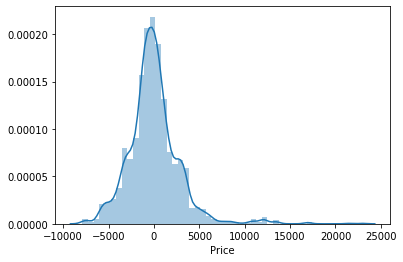

In [8]:
sns.distplot(y_test-pred)

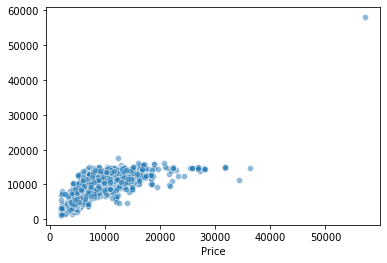

In [9]:
sns.scatterplot(y_test,pred,alpha=0.5)

### Random forest regressor

In [10]:
# Implementing random forest regressor

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

C:\Users\Admin\anaconda new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
print("Train score",rf.score(x_train,y_train))
print("Test score",rf.score(x_test,y_test))

Train score 0.9458777880803783
Test score 0.7871546316953717


In [12]:
# checking model accuracy

print("Mean square error",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score",r2_score(y_test,y_pred))

Mean square error 4589383.819721356
RMSE 2142.284719574258
r2 score 0.7871546316953717


### Hyperparameter tuning

In [13]:
# Randomizedsearchcv

random_parameters={'n_estimators':[int(x) for x in np.linspace(100,1200,num=12)],
                  'max_features':['auto','sqrt','log2'],
                  'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
                  'min_samples_split':[2,5,10,15,100],
                  'min_samples_leaf':[1,2,5,10]}

In [14]:
random_rf=RandomizedSearchCV(estimator=rf,param_distributions=random_parameters,n_iter=10,scoring="neg_mean_squared_error",
                            cv=10,verbose=2,random_state=42,n_jobs=1)
random_rf.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  37.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  30.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  30.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  26.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  27.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  27.0s
[CV] n_estimators=900, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 25.5min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=...


In [15]:
random_rf.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [16]:
pred_y=random_rf.predict(x_test)
pred_y

array([17071.25634375,  5835.91750661,  8650.09992607, ...,
        6827.29331499, 12437.21563471, 12480.12572344])

In [18]:
print("Mean square error",mean_squared_error(y_test,pred_y))
print("RMSE",np.sqrt(mean_squared_error(y_test,pred_y)))
print("r2 score",r2_score(y_test,pred_y))

Mean square error 4062026.117828737
RMSE 2015.4468779476022
r2 score 0.8116123037264793


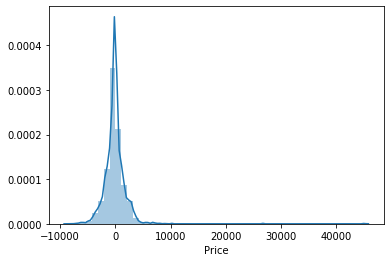

In [21]:
sns.distplot(y_test-pred_y)

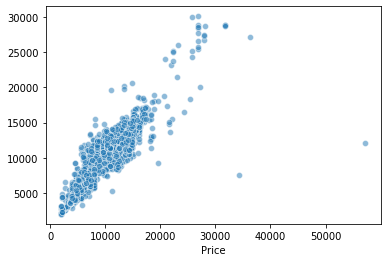

In [22]:
sns.scatterplot(y_test,pred_y,alpha=0.5)